# Table of Contents

[Context](#Co)<br>
        
0. [**Merging data files**](#0)<br>
    [Import](#0.1)<br>
    [Columns comparison](#0.2)<br>
    [Rows comparison](#0.3) <br>
    [Last adjustments](#0.4) <br>
    
    
1. [**Business validation**](#1)<br>
    [Rules and Constraints](#1.1) <br>
    [Accuracy](#1.2) <br>
    [Consistency](#1.3) <br>
    [Uniformity](#1.4) <br>
    
    
2. [**Analytic validation**](#2) <br>
    [Irregular Data](#1.4) <br>
    [Unnecessary Data](#1.4) <br>    
    
    
3. [**Final report**](#3)
    


<a name="Co"></a>
# Context

The **World Happiness Report** is a landmark survey of the state of global happiness from 2015 to 2019 in the world according to 6 main factors:
* economic production, 
* social support, 
* life expectancy, freedom, 
* absence of corruption, 
* and generosity

### Purposes of the project
<ins> Data analysis: </ins>
1. Give a clear picture of happiness around the world in 2019
2. Analyse trends in happiness from 2015 to 2019

<ins> Forecasting with Machine Learning</ins>(\*)
1. Can we predict a country happiness if we know the gdp per capita, life expectancy and other factors values?
2. Can we predict a country happiness thanks to its history (happiness+factors)?

(\*) *Although data don't contain related information, the global pandemic may have a tremendous impact on the results*


### Workflow
* **Cleaning**
* EDA
* Data Visualization
* Features Engineering
* Machine Learning

---------

Cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from the datato ensure that further analysis will be based on meaningful and relevant information.

In this notebook, we will go through business and analytical data tests.

*(Only tests related to the data will be mentioned but you can find a more exhaustiv list of tests [here](https://docs.google.com/document/d/1YCiHygWCx6A3R4XvKI8LnHtNd4yFUgSbumGx9fVAxXI/edit#heading=h.wvf1xn11p9y0))*


------------
------------
<a name="0"></a>
# 0. Merging data files

Since our data are split in in 5 files (one for each year of study), our first task is to import the different files and ensure that their information can be matched in order to gather it all in a single dataset.

<a name="0.1"></a>
## Import

Let's first import the required packages to import, investigate and plot data: **pandas**, **numpy** and **matplotlib**µ

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

We now need to import the 5 data files. For convenience, we'll store them into a dictionnary

In [3]:
# We create a dictionnary where we'll store our 5 DataFrames, imported from data files
dict_data = {}

# for each year of study, store data as DataFrame in the dict
for year in range(2015, 2020):
    df = pd.read_csv('data/'+str(year)+'.csv')
    dict_data[year] = df

Let's have a quick overview of rows and columns for each file

In [4]:
# We create a DataFrame where we'll store row and col numbers for each year of study
df_dim = pd.DataFrame(['row','col'])
# for each year, store row and col numbers in the DataFrame
for year in range(2015, 2020):
    df_dim = pd.concat([df_dim, pd.DataFrame(dict_data[year].shape, columns=[str(year)])],axis=1)
# set index
df_dim.set_index(0, inplace=True)
df_dim.index.name = None

display(df_dim)

,2015,2016,2017,2018,2019
row,158,157,155,156,156
col,12,13,12,9,9


As we can see, datasets differs in rows and columns. Thus, we now have to investigate and find a common structure to gather them.

---------------
<a name="0.2"></a>
## Columns comparison

First, we need to try to identify the features shared/not shared by all the datasets

In [5]:
# We create a DataFrame to store the columns lists for each set.
df_col = pd.DataFrame()
# For each year, store columns in DataFrame
for year in range(2015, 2020):
    df_col = pd.concat([df_col, pd.DataFrame(dict_data[year].columns.tolist(), columns=[str(year)])],axis=1)

display(df_col)

,2015,2016,2017,2018,2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,NaN,NaN


OK. Looking at this output, we can easily notice 3 different cases:

**1. Features shared by the 5 sets with the  same (or slightly different) names**
- Happiness Rank / Happiness.Rank / Overall rank
- Happiness Score/ Happiness.Score / Happiness.Score / Score
- Economy (GDP per Capita) / Economy..GDP.per.Capita./ GDP per capita
- Health (Life Expectancy) / Health..Life.Expectancy. / Healthy life expectancy
- Freedom / Freedom to make life choices
- Generosity


**2. Features who seem to be the same but need a deeper examination**
- Country + Region / Country / Country or region
- Trust (Government Corruption)	/ Trust..Government.Corruption.	/ Perceptions of corruption	
- Family / Social Support


**3. Other features that are not contained in all the data files**
- 2015, 2016, 2017: Dystopia Residual / Dystopia.Residual	
- 2015 : Standard error
- 2016 : Lower Confidence Interval + Upper Confidence Interval	
- 2017 : Whisker.high + Whisker.low

-----------
**1. Features shared by the 5 sets with the  same (or slightly different) names**

This case is easy to deal with. We just have to rename the features (in respect of naming convensions: lower case and underscores)

In [6]:
# 2015 
dict_data[2015].rename(columns={'Happiness Rank': "happiness_rank",  "Happiness Score": "happiness_score", "Economy (GDP per Capita)":"gdp_per_capita", 
                                "Health (Life Expectancy)": "life_expectancy", "Freedom": "freedom", "Generosity": "generosity"}, inplace=True)
# 2016
dict_data[2016].rename(columns={'Happiness Rank': "happiness_rank", "Happiness Score": "happiness_score", "Economy (GDP per Capita)":"gdp_per_capita", 
                                "Health (Life Expectancy)": "life_expectancy", "Freedom": "freedom", "Generosity": "generosity"}, inplace=True)
# 2017
dict_data[2017].rename(columns={'Happiness.Rank': "happiness_rank", "Happiness.Score": "happiness_score", "Economy..GDP.per.Capita.":"gdp_per_capita", 
                                "Health..Life.Expectancy.": "life_expectancy", "Freedom": "freedom", "Generosity": "generosity"}, inplace=True)
# 2018
dict_data[2018].rename(columns={'Overall rank': "happiness_rank", "Score": "happiness_score", "GDP per capita":"gdp_per_capita", 
                                "Healthy life expectancy": "life_expectancy", "Freedom to make life choices": "freedom", "Generosity": "generosity"}, inplace=True)
# 2019
dict_data[2019].rename(columns={'Overall rank': "happiness_rank", "Score": "happiness_score", "GDP per capita":"gdp_per_capita",  
                                "Healthy life expectancy": "life_expectancy", "Freedom to make life choices": "freedom", "Generosity": "generosity"}, inplace=True)

**2. Features who seem to be the same but need a deeper examination**

For the following features, we need to go deeper to make sure they contain the same information

* Country + Region / Country / Country or Region 

In [7]:
# First, let's store countries values in dict
d_countries = {}
d_countries[2015] = dict_data[2015]['Country'].tolist()
d_countries[2016] = dict_data[2016]['Country'].tolist()
d_countries[2017] = dict_data[2017]['Country'].tolist()
d_countries[2018] = dict_data[2018]['Country or region'].tolist()
d_countries[2019] = dict_data[2019]['Country or region'].tolist()

# Identify the countries that appear in all sets.
l_common_countries = set(d_countries[2015]).intersection(d_countries[2016], d_countries[2017], d_countries[2018], d_countries[2019])
print(str(len(l_common_countries))+" are present in the 5 datasets")

141 are present in the 5 datasets


Since we know that sets contains between 155 and 158 rows each, we can assert that all the features contains the same information

------------
* Trust (Government Corruption) / Trust..Government.Corruption. / Perceptions of corruption

Let's compare the distribution in the 5 sets:

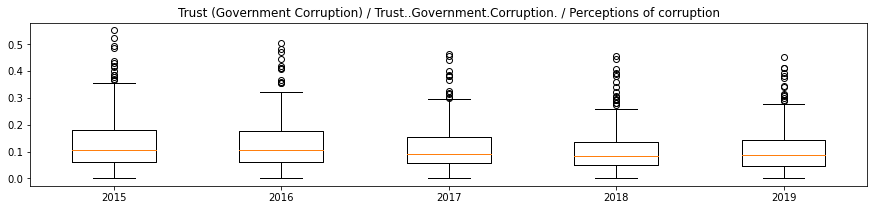

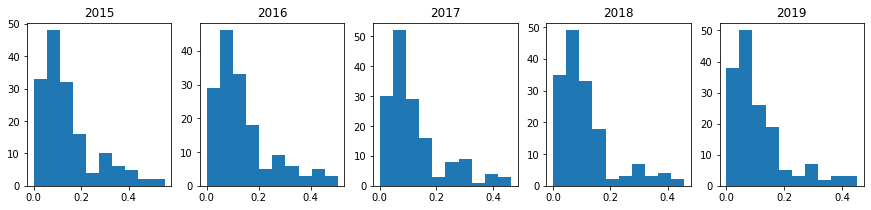

In [8]:
# First, let's store government corruption values in dict
d_gov = {}
d_gov[2015] = dict_data[2015]['Trust (Government Corruption)'].tolist()
d_gov[2016] = dict_data[2016]['Trust (Government Corruption)'].tolist()
d_gov[2017] = dict_data[2017]['Trust..Government.Corruption.'].tolist()
d_gov[2018] = dict_data[2018]['Perceptions of corruption'].fillna(dict_data[2018]['Perceptions of corruption'].median())
d_gov[2019] = dict_data[2019]['Perceptions of corruption']

# Boxplot
pyplot.figure(figsize=(15,3))
pyplot.boxplot([d_gov[2015], d_gov[2016], d_gov[2017], d_gov[2018], d_gov[2019]])
pyplot.xticks([1, 2, 3, 4, 5], ['2015', '2016', '2017','2018','2019'])
pyplot.title('Trust (Government Corruption) / Trust..Government.Corruption. / Perceptions of corruption')
pyplot.show()

# Histogram
pyplot.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    pyplot.subplot(i)
    pyplot.hist(d_gov[year])
    pyplot.title(str(year))
    i+=1
pyplot.show()

We can observe that distribution over the years is very similar. Again, we can assert the 5 features contain the same information.

----------
* Family / Social Support

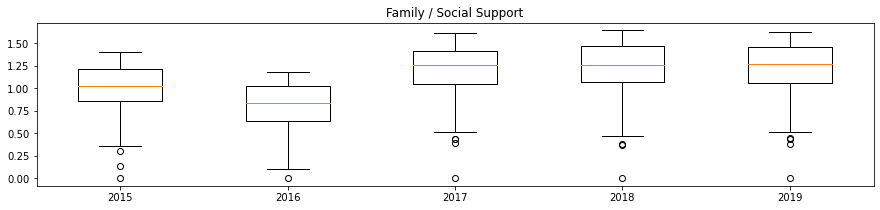

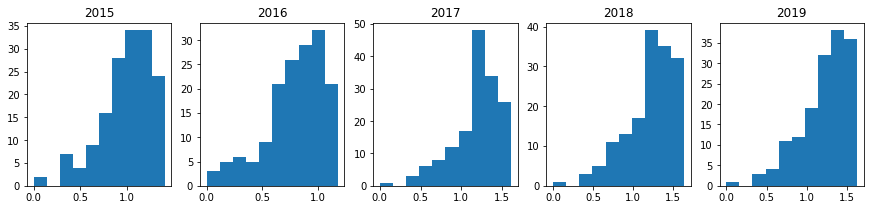

In [9]:
# First, let's store government corruption values in dict
d_gov = {}
d_gov[2015] = dict_data[2015]['Family'].tolist()
d_gov[2016] = dict_data[2016]['Family'].tolist()
d_gov[2017] = dict_data[2017]['Family'].tolist()
d_gov[2018] = dict_data[2018]['Social support']
d_gov[2019] = dict_data[2019]['Social support']

# Boxplot
pyplot.figure(figsize=(15,3))
pyplot.boxplot([d_gov[2015], d_gov[2016], d_gov[2017], d_gov[2018], d_gov[2019]])
pyplot.xticks([1, 2, 3, 4, 5], ['2015', '2016', '2017','2018','2019'])
pyplot.title('Family / Social Support')
pyplot.show()

# Histogram
pyplot.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    pyplot.subplot(i)
    pyplot.hist(d_gov[year])
    pyplot.title(str(year))
    i+=1
pyplot.show()

# => We can observe that the distribution is very similar between 2017 and (2018-2019). 
# Thus, we can assume that Social support and family 


Looking at the distribution, which is very similar between 2017 and 2018, we can assert that Family and Social support contain the same information.
 
Let's rename the 3 features with common names: `country`, `coruption_perception` and `social_support`

In [10]:
# country
dict_data[2015].rename(columns={'Country': "country"}, inplace=True)
dict_data[2016].rename(columns={'Country': "country"}, inplace=True)
dict_data[2017].rename(columns={'Country': "country"}, inplace=True)
dict_data[2018].rename(columns={'Country or region': "country"}, inplace=True)
dict_data[2019].rename(columns={'Country or region': "country"}, inplace=True)

# corruption_perception
dict_data[2015].rename(columns={'Trust (Government Corruption)': "corruption_perception"}, inplace=True)
dict_data[2016].rename(columns={'Trust (Government Corruption)': "corruption_perception"}, inplace=True)
dict_data[2017].rename(columns={'Trust..Government.Corruption.': "corruption_perception"}, inplace=True)
dict_data[2018].rename(columns={'Perceptions of corruption': "corruption_perception"}, inplace=True)
dict_data[2019].rename(columns={'Perceptions of corruption': "corruption_perception"}, inplace=True)

# social_support
dict_data[2015].rename(columns={'Family': "social_support"}, inplace=True)
dict_data[2016].rename(columns={'Family': "social_support"}, inplace=True)
dict_data[2017].rename(columns={'Family': "social_support"}, inplace=True)
dict_data[2018].rename(columns={'Social support': "social_support"}, inplace=True)
dict_data[2019].rename(columns={'Social support': "social_support"}, inplace=True)

---------
**3. Other features that are not contained in all the data files**

Since the purpose of this project is to analyse `happiness`` through time, we take the side of removing these features.

In [11]:
# 2015, 2016, 2017: Dystopia Residual / Dystopia.Residual
# 2015 : Standard error
# 2016 : Lower Confidence Interval + Upper Confidence Interval
# 2017 : Whisker.high + Whisker.low
dict_data[2015] = dict_data[2015].drop(columns=['Dystopia Residual','Standard Error'])
dict_data[2016] = dict_data[2016].drop(columns=['Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval'])
dict_data[2017] = dict_data[2017].drop(columns=['Dystopia.Residual','Whisker.high','Whisker.low'])


-----------
<a name="0.3"></a>
## Rows comparison
As we saw earleier, 141 countries are common between the 5 sets, let's keep only these ones.

In [12]:
# For each set, we only keep the 141 common countries previously identified
for year in range(2015, 2020):
    df = dict_data[year]
    df = df[df['country'].isin(l_common_countries)]
    dict_data[year] = df
    
# We could look closer to the name and try to find same countries with different orthographes but we won't do that here.

Our 5 files now contain the same countries. But because we removed some observations in each, we have to recalculate the `happiness rank`

In [13]:
for year in range(2015, 2020):
    df = dict_data[year].sort_values(by='happiness_rank')
    df['happiness_rank'] = np.arange(len(df))+1
    dict_data[year] = df
    
print("Done !")

Done !


-------------
<a name="0.4"></a>
## Last adjustments

* Since 2015 and 2016 sets contains corresponding `regions` to `countries`, we can add this information to the others sets

In [14]:
# Rename Region in respect of naming conventions
dict_data[2015].rename(columns={'Region':'region'}, inplace=True)
dict_data[2016].rename(columns={'Region':'region'}, inplace=True)

# add region information in 2017-2019 sets
df_country_reg = dict_data[2015][['country','region']].copy()
for year in range(2017,2020):
    dict_data[year] = pd.merge(dict_data[year], df_country_reg, on='country', how='inner')
    print(dict_data[year].shape)

(141, 10)
(141, 10)
(141, 10)


* We add a new column containing the `year` of study

In [15]:
# for each set, create a new column "year" containing the year of study
for year in range(2015,2020):
    if 'year' not in dict_data[year].columns.tolist():
        dict_data[year]['year']=year

------------
## Validation and merge

let's take a look at our modified data files to ensure they can be merged

In [16]:
# Same as we did earlier
df_col = pd.DataFrame()

for year in range(2015, 2020):
    dict_data[year] = dict_data[year].reindex(sorted(dict_data[year].columns), axis=1)
    df_col = pd.concat([df_col, pd.DataFrame(dict_data[year].columns.tolist(), columns=[str(year)])],axis=1)

display(df_col)

,2015,2016,2017,2018,2019
0,corruption_perception,corruption_perception,corruption_perception,corruption_perception,corruption_perception
1,country,country,country,country,country
2,freedom,freedom,freedom,freedom,freedom
3,gdp_per_capita,gdp_per_capita,gdp_per_capita,gdp_per_capita,gdp_per_capita
4,generosity,generosity,generosity,generosity,generosity
5,happiness_rank,happiness_rank,happiness_rank,happiness_rank,happiness_rank
6,happiness_score,happiness_score,happiness_score,happiness_score,happiness_score
7,life_expectancy,life_expectancy,life_expectancy,life_expectancy,life_expectancy
8,region,region,region,region,region
9,social_support,social_support,social_support,social_support,social_support


The first step of cleaning our data is over. As we can see, our 5 datasets columns match perfectly, we can now merge the 5 sets in a single DataFrame

In [17]:
# We create our gathering dataset
df = pd.DataFrame()

# we store each set in it
for year in range(2015,2020):
    df = pd.concat([df, dict_data[year]])

print("gathering dataset dimensions:",df.shape)
display(pd.DataFrame({"columns":df.columns.tolist()}))

gathering dataset dimensions: (705, 11)


,columns
0,corruption_perception
1,country
2,freedom
3,gdp_per_capita
4,generosity
5,happiness_rank
6,happiness_score
7,life_expectancy
8,region
9,social_support


---------------
---------------
<a name="1"></a>
# 1. Business validation

There are a number of ways to examine data sets for errors and anomalies, but all depend upon preconstructed validation rules. These rules set expected parameters for data, and they vary widely in complexity based upon the needs of the user. 

<a name="1.1"></a>
## Rules and Constraints
Test if the data data conform to defined business rules or constraints.

*Since we have no business expert for this dataset, we'll try to figure out our propre rules.*

**Data types**

In [18]:
df.dtypes

corruption_perception    float64
country                   object
freedom                  float64
gdp_per_capita           float64
generosity               float64
happiness_rank             int32
happiness_score          float64
life_expectancy          float64
region                    object
social_support           float64
year                       int64
dtype: object

As we can expect:
* `country` and `region are categorical features
* `year` and `happiness rank` are integer numbers
* `happiness score` and `factors` are float numbers (decimal)

Nothing to change here.

**Range**

In [19]:
# We define a function to compute the min and max of a column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# We apply our function to numerica data
df._get_numeric_data().apply(minMax)

,corruption_perception,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,social_support,year
min,0.00000,0.000,0.000,0.000000,1,2.839,0.000,0.000,2015
max,0.55191,0.724,2.096,0.838075,141,7.769,1.141,1.644,2019


As we can expect:
* `year` range is between 2015 and 2019
* `happiness rank` values are between 1 and 141
* `happiness score` and `factors` are >0

Nothing to change here.

**Mandatory**

Some features are required not to be empty. In this dataset, we expect `country` (identifier) and `happinesss core` (project focus) to be filled.

In [20]:
df[['country','happiness_score']].isna().sum()

country            0
happiness_score    0
dtype: int64

`Country` and `happiness score` columns don't contain missing data

--------------
<a name="1.2"></a>
## Accuracy
We want to make sure the values in the data are true.
Since we have no expertise on this dataset, all we can do is to check the `happiness rank` according to the `happiness score`

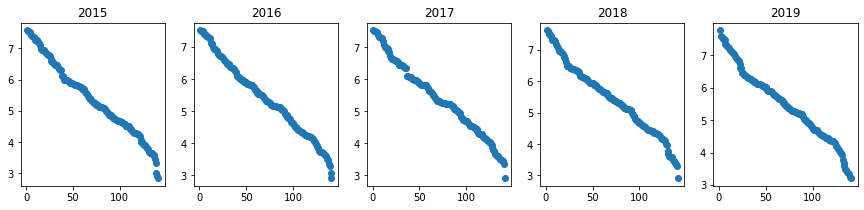

In [21]:
# Scatter plot
pyplot.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    pyplot.subplot(i)
    df_tmp = df[df['year']==year]
    pyplot.scatter(x=df_tmp['happiness_rank'], y=df_tmp['happiness_score'])
    pyplot.title(str(year))
    i+=1
pyplot.show()



As expected, the higher the score, the better the rank

<a name="2"></a>
# Analytic validation

As well as allowing us to work on more meaningful information, cleaning the data in an analytical way  is mandatory for an efficient use of Data Science algorithms. Thus, it is important to understand how to detect and clean anomalies in order to improve data quality.
Inspecting the data is time-consuming and requires using many methods for exploring the underlying data for error detection, such as descriptives statistiques and data visualization.

*(Only tests related to our data will be mentioned but you can find the whole list [here](https://docs.google.com/document/d/1YCiHygWCx6A3R4XvKI8LnHtNd4yFUgSbumGx9fVAxXI/edit#heading=h.wvf1xn11p9y0))*

<a name="2.1"></a>
## Irregular data

* Missing data

In [22]:
# Let's plot the features that contains at least 1 missing values
na_df = pd.DataFrame({'missing_values':df.isna().sum()})

display(na_df[na_df['missing_values']>0])

# let's plot the lines concerned by the missing value
display(df[df['corruption_perception'].isna()])

,missing_values
corruption_perception,1


,corruption_perception,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,region,social_support,year
19,NaN,United Arab Emirates,0.284,2.096,0.186,20,6.774,0.67,Middle East and Northern Africa,0.776,2018


As we can see, there is only one missing value: `corruption perception` in 2018 for United Arab Emirates. The best way to input it is to use the value from 2017.

In [23]:
# get corruption_perception values for the year 2017
df_corrupt_2017 = dict_data[2017][['country', 'corruption_perception']].rename(columns={'corruption_perception':'corr_2017'})

# merge
df_temp =pd.merge(df, df_corrupt_2017, on='country')

# replace value
df_temp['corruption_perception'] = df_temp.apply(
    lambda row: row['corr_2017'] if np.isnan(row['corruption_perception']) else row['corruption_perception'],
    axis=1
)

df = df_temp.drop(['corr_2017'], axis=1)

print("Done!")

Done!


* outliers:

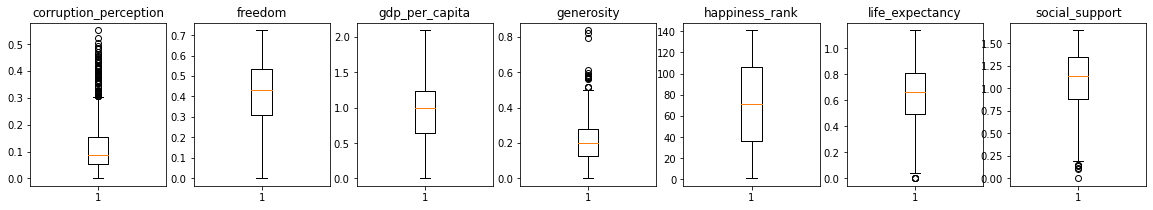

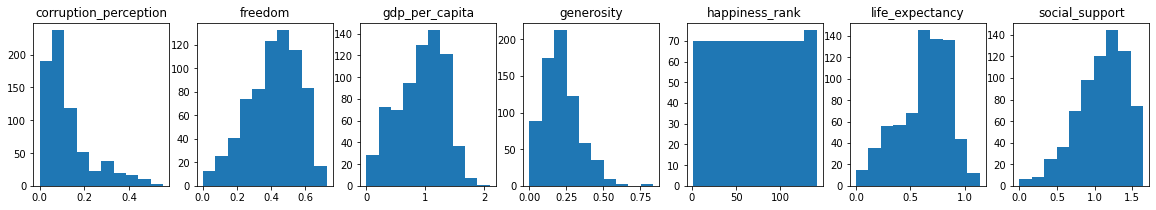

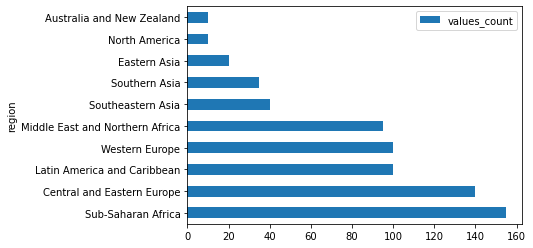

In [24]:
#boxplot
pyplot.figure(figsize=(20,3))

i=171
for col in['corruption_perception','freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'life_expectancy', 'social_support']:
    pyplot.subplot(i)
    pyplot.boxplot(df[col])
    pyplot.title(col)
    i+=1
pyplot.show()

pyplot.figure(figsize=(20,3))
j = 171
for col in['corruption_perception','freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'life_expectancy', 'social_support']:
    pyplot.subplot(j)
    pyplot.hist(df[col])
    pyplot.title(col)
    j+=1
pyplot.show()

#pyplot.figure(figsize=(20,3))
pd.DataFrame(df['region'].value_counts()).reset_index().rename(columns={'index':'region', 'region':'values_count'}).plot.barh(x='region',y='values_count')
pyplot.show()


We can observe that `corruption perception` and `genoristy` features may have some extrem values. We'll use the IQR method to replace them.

In [25]:
# We define a function that returns outliers thresholds using IQR
def outliers_th(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    
    return lower_range, upper_range

lower_corrupt, upper_corrupt = outliers_th(df['corruption_perception'])
lower_gen, upper_gen = outliers_th(df['generosity'])


# number of outliers for corruption_perception
print("number of corruption_perception outliers: "+str((df['corruption_perception']>upper_corrupt).sum()))

# number of outliers for generosity
print("number of generosity outliers: "+str((df['generosity']>upper_gen).sum()))

# replace values
df['corruption_perception'] = df.apply(
    lambda row: upper_corrupt if row['corruption_perception']>upper_corrupt else row['corruption_perception'],
    axis=1)

df['generosity'] = df.apply(
    lambda row: upper_gen if row['generosity']>upper_gen else row['generosity'],
    axis=1)

print("\n==> outliers values have been replace thanks to IQR method")

number of corruption_perception outliers: 67
number of generosity outliers: 15

==> outliers values have been replace thanks to IQR method


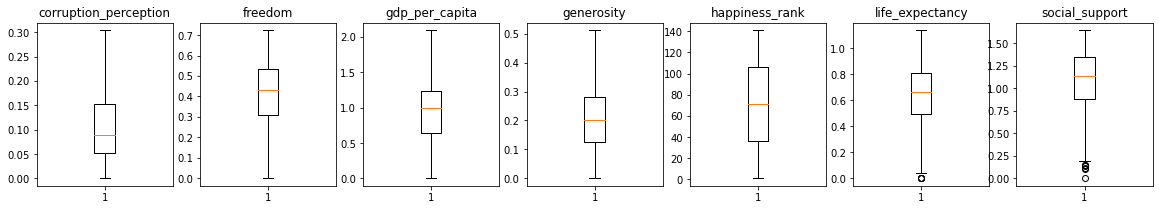

In [26]:
#boxplot
pyplot.figure(figsize=(20,3))

i=171
for col in['corruption_perception','freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'life_expectancy', 'social_support']:
    pyplot.subplot(i)
    pyplot.boxplot(df[col])
    pyplot.title(col)
    i+=1
pyplot.show()

----------
<a name="2.2"></a>
## Unnecessary Data

* Uninformative / repetitive: features with many rows having the same values

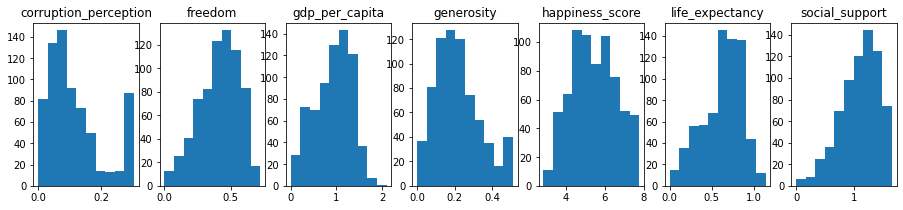

`
 Regions:


Sub-Saharan Africa                 155
Central and Eastern Europe         140
Latin America and Caribbean        100
Western Europe                     100
Middle East and Northern Africa     95
Southeastern Asia                   40
Southern Asia                       35
Eastern Asia                        20
North America                       10
Australia and New Zealand           10
Name: region, dtype: int64

In [27]:
pyplot.figure(figsize=(20,3))
j = 191
for col in [col for col in df.columns.tolist() if col not in ['country','happiness_rank','year','region']]:
    pyplot.subplot(j)
    pyplot.hist(df[col])
    pyplot.title(col)
    j+=1
pyplot.show()

print("`\n Regions:")
display(df["region"].value_counts())

We can see that all of the features are well distributed

----------
<a name="2.2"></a>
## Inconsistent Data

* Data Normalization

In order to have a better understanding of the further analysis, and because many machine learning models work better with similar scaled variables, we rescale the different scores (`happiness score` and `factors``) to range 0-100

In [28]:
# Rescale
df_norm = df.copy()
for col in ['corruption_perception', 'freedom', 'gdp_per_capita', 
            'generosity', 'happiness_score', 'life_expectancy', 'social_support']:
        
        df_norm[col] = (df_norm[col]-df_norm[col].min())/(df_norm[col].max()-df_norm[col].min())*100

------------
------------
<a name="3"></a>
# 3. Final report

## The changes we made

In this notebook, we cleaned our raw data files to ease and improve the quality of our further analysis.

**Our first task was to gather the 5 data files (one for each year of study) into one single dataset. To do so, we had to make some modifications to**
* We renamed features that contained same informations but had different names.
* We removed features which were not present for all the years of study: Dystopia residual, standard error and confidence interval 
* We made sure to have the same countries for all the years of study because we aim to look at happiness evolution through time. So we removed about 10% of the countries in each file and kept 141 countries for our final dataset. (This step can be improved by finding countries with different orthographes in the files)
* We finally merged the files into a single dataset that we will use for deeper analysis

=> The dataset set now contains the following features: `country`, `happiness_score`, `happiness_rank`, `gdp_per_capita`, `life_expectancy`, `social_support`, `freedom`, `corruption_perception`, `generosity`, `region`, `year`

**After this step, we corrected the data according to business Expertise. Since we have no real expertise, we tried to figure out our own rules. We looked for different kinds of invalid data:**
* Data types
* Data ranges
* Mandatody values
* Accuracy of the value

Fortunately, the data respected all our rules and we havn't had to make modifications.

**Finally, our last task was to verify the data in an analytical way by looking for anomalies in our features:**
* Missing values
* Outliers
* repetitive data
* Data normalization

Only one single missing value has been found, and replaced with the mean of the other values for the same feature.

## The final dataset

In [29]:
print("Our final datasets contains "+str(df.shape[0])+' observations and '+str(df.shape[1])+' columns')
display(pd.DataFrame({"Features":df.columns.tolist()}))

# export
df.to_csv('data/data_clean.csv', index=False)
df_norm.to_csv('data/data_clean_norm.csv', index=False)

Our final datasets contains 705 observations and 11 columns


,Features
0,corruption_perception
1,country
2,freedom
3,gdp_per_capita
4,generosity
5,happiness_rank
6,happiness_score
7,life_expectancy
8,region
9,social_support


In [30]:
df_test = pd.read_csv('data/data_clean.csv')
print(df_test.shape)
display(df_test.sample(10))

(705, 11)


,corruption_perception,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,region,social_support,year
262,0.130688,Nicaragua,0.447552,0.737299,0.301674,41,6.071,0.653096,Latin America and Caribbean,1.287216,2017
96,0.304316,United Arab Emirates,0.562150,1.573520,0.265910,27,6.573,0.729930,Middle East and Northern Africa,0.871140,2016
111,0.304316,Singapore,0.487700,1.645550,0.327060,21,6.739,0.947190,Southeastern Asia,0.867580,2016
288,0.039000,Croatia,0.380000,1.115000,0.120000,77,5.321,0.737000,Central and Eastern Europe,1.161000,2018
358,0.032000,Nigeria,0.462000,0.689000,0.201000,85,5.155,0.048000,Sub-Saharan Africa,1.172000,2018
99,0.182000,United Arab Emirates,0.598000,1.503000,0.262000,21,6.825,0.825000,Middle East and Northern Africa,1.310000,2019
417,0.099332,Philippines,0.585215,0.857699,0.193513,67,5.430,0.468009,Southeastern Asia,1.253918,2017
304,0.028000,Jamaica,0.490000,0.831000,0.107000,54,5.890,0.831000,Latin America and Caribbean,1.478000,2019
237,0.010091,Moldova,0.240729,0.728871,0.208779,53,5.838,0.589465,Central and Eastern Europe,1.251826,2017
324,0.028000,Turkmenistan,0.394000,1.052000,0.244000,82,5.247,0.657000,Central and Eastern Europe,1.538000,2019
